In [94]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [95]:
model = tf.keras.models.load_model('model.h5')

In [96]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [97]:
model.inputs

[<KerasTensor: shape=(None, 180, 180, 3) dtype=float32 (created by layer 'sequential_1_input')>]

In [98]:
import cv2

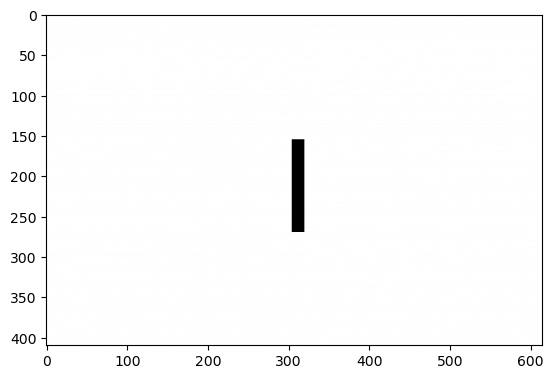

In [99]:
image = "i.jpeg"

img = cv2.imread(image)
plt.imshow(img)
img.resize(1,180,180,3)

# normalize
img = img.astype('float32')
img = img / 255.0




In [100]:
res = model.predict(img)

1/1 [==============================] - 0s 386ms/step


In [101]:
res

array([[ 33.002777,  48.595337, -31.349459,  11.846215, -17.681583,
        -32.98633 ,   9.622453, -16.071383, -97.474556]], dtype=float32)

In [102]:
res


array([[ 33.002777,  48.595337, -31.349459,  11.846215, -17.681583,
        -32.98633 ,   9.622453, -16.071383, -97.474556]], dtype=float32)

In [103]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
score = tf.nn.softmax(res[0])
print(score)
print(np.argmax(score))
print(class_names[np.argmax(score)])


tf.Tensor(
[1.69136470e-07 9.99999881e-01 1.90729196e-35 1.09662662e-16
 1.64551123e-29 3.71135939e-36 1.18656346e-17 8.23381936e-29
 0.00000000e+00], shape=(9,), dtype=float32)
1
B


<BarContainer object of 9 artists>

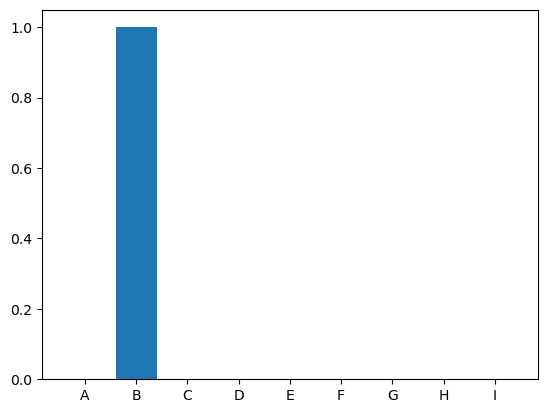

In [104]:
# bargraph score with class names
plt.bar(class_names, score)